# Segmentação de imagens


   * Em visão computacional, segmentação se refere ao processo de dividir uma imagem digital em múltiplas regiões (conjunto de pixels) ou objetos, com o objetivo de simplificar e/ou mudar a representação de uma imagem para facilitar a sua análise. Segmentação de imagens é tipicamente usada para localizar objetos e formas (linhas, curvas, etc) em imagens.


   * O resultado da segmentação de imagens é um conjunto de regiões/objetos ou um conjunto de contornos extraídos da imagem. Como resultado, cada um dos pixels em uma mesma região é similar com referência a alguma característica ou propriedade computacional, tais como cor, intensidade, textura ou continuidade.


<img src="https://miro.medium.com/max/1838/1*f8UN4rrXIWjuciyODBTXxg.gif" width="900" height = "480">


## Aplicações
* Imagens médicas
   * Localização de tumores e outras patologias
   * Mensurar volumes de tecido
   * Planejamento de cirurgia
   <img src="https://www.researchgate.net/profile/Sergio-Escalera/publication/339873650/figure/fig1/AS:868106524168192@1583984132224/Different-applications-of-medical-image-segmentation.png" width="900" height = "480">

* Detecção de objetos
   * Detecção de pedestres
   * Detecção de faces
   * Localização objetos em imagens de satélite (estradas, florestas, plantações, etc.)
   <img src="https://mcl.korea.ac.kr/~dotol1216/CVPR2017_CTN/CTN_results.PNG" width="900" height = "480">
* Tarefas de Reconhecimento
   * Reconhecimento facial
   * Reconhecimento de impressão digital
   <img src="https://ars.els-cdn.com/content/image/1-s2.0-S0923596518302169-gr2.jpg" width="900" height = "480">
* Sistemas de controle de tráfego
    * Video vigilância
    * Localização de ações
    
    <img src="https://www.makeacademicproject.com/wp-content/uploads/2021/01/object-detection-2.png" width="900" height = "480">


## Métodos de segmentação de imagens
* Apresentação 1 (Limiarização):
    * [*Threshold* simples](https://en.wikipedia.org/wiki/Thresholding_(image_processing))    
    * [*Adaptive Threshold*](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html)
    * [*Otsu’s thresholding*](https://en.wikipedia.org/wiki/Otsu's_method)
* Apresentação 2 (Métodos baseados em contornos/bordas)
    * [ Operador Sobel]()
    * [Canny](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html)
    * [Laplaciano]()
    * [Bacia hidrográfica (*Watershed Algorithm*)](https://docs.opencv.org/3.4/d3/db4/tutorial_py_watershed.html)
    

* Apresentação 3
    * [Superpixel]()
    * [K-means]()
    * [Segmentação semântica]()

In [2]:
import cv2
import  numpy as np
import matplotlib.pyplot as plt
import imutils

###  Limiarização (*Threshold* simples)
   * [*Threshold* simples](https://en.wikipedia.org/wiki/Thresholding_(image_processing)). No processamento de imagem digital, o limiar é o método mais simples de segmentar imagens. A partir de uma imagem em tons de cinza, a limiarização pode ser usada para criar imagens binárias. Os métodos de limite mais simples substituem cada pixel em uma imagem por um pixel preto se a intensidade da imagem $I_{ij}$ é menor do que alguma constante fixa $T$ ($ I_{ij} < T$), ou um pixel branco se a intensidade da imagem for maior do que essa constante. Mais exemplos  de [Threshold](https://scikit-image.org/docs/dev/auto_examples/applications/plot_thresholding.html#sphx-glr-auto-examples-applications-plot-thresholding-py).
   
\begin{equation}
L(x,y) = \left \{
\begin{array}{cc}
1, & \mbox{if } \ I(x,y) > T(x,y) \\
0, & \mbox{if } \ I(x,y) \leq T(x,y) \\
\end{array}
\right.
\end{equation}


In [6]:
img_01 = cv2.imread('images/arroz.png')
img_01 = cv2.resize(img_01, (500, 500)) 
gray_image = cv2.cvtColor(img_01, cv2.COLOR_BGR2GRAY) 

_,seg_01  = cv2.threshold(gray_image,100, 255,cv2.THRESH_BINARY)

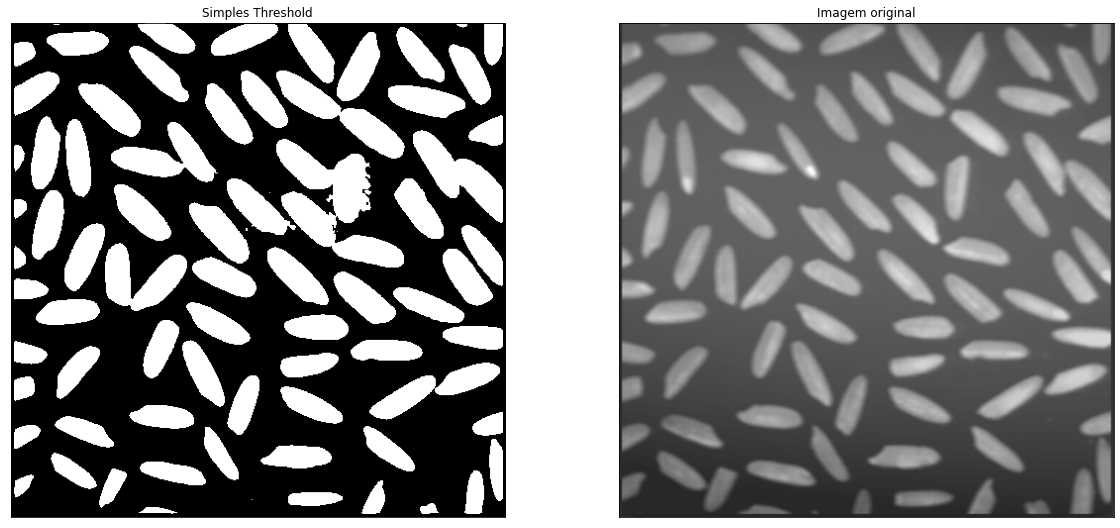

In [7]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1),plt.imshow(seg_01,cmap = 'gray')
plt.title('Simples Threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_01,cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.show()

### Limiarização (*Adaptive Threshold*)
* [*Adaptive Threshold*](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html) O *Thresholding* Adaptativo, é um algoritmo de segmentação baseado limiaridade que usa limiares adaptativos, este algoritmo determina o limite de um pixel com base em uma pequena região ao seu redor. Portanto, é obtido limites diferentes para regiões diferentes da mesma imagem, o que dá melhores resultados para imagens com iluminação variável.

<img src="https://i.pinimg.com/originals/1e/0b/f3/1e0bf3ad7d8ab1f70e42afa07c7c7d0c.gif" width="600" height = "480">



In [8]:
# OpenCV adaptiveThreshold 
seg_02 = cv2.adaptiveThreshold(gray_image, 255.0,
                               cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,  51,  -20.0)

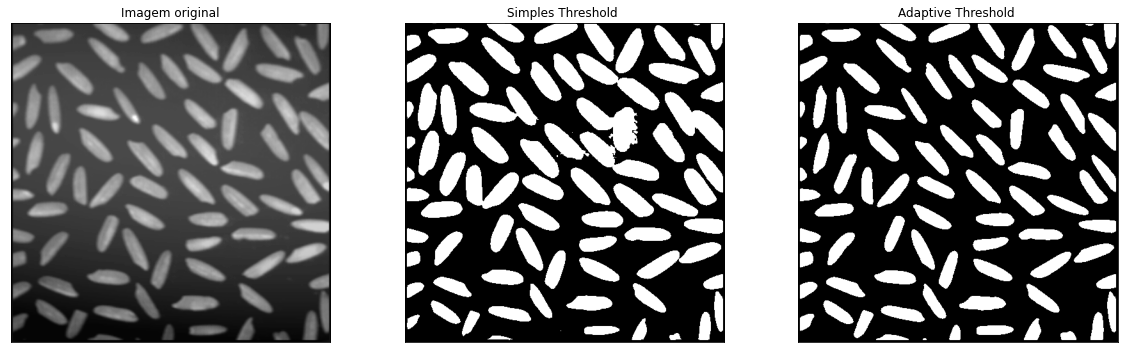

In [9]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1),plt.imshow(gray_image,cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,2),plt.imshow(seg_01,cmap = 'gray')
plt.title('Simples Threshold '), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,3),plt.imshow(seg_02,cmap = 'gray')
plt.title('Adaptive Threshold '), plt.xticks([]), plt.yticks([])
plt.show()

### *ADAPTIVE_THRESH_MEAN_C*

* O primeiro é a imagem que será segmentada que deve ser uma imagem em tons de cinza (image).
* O segundo consiste no valor máximo atribuído a valores de pixel que excedem o limite (255.0).
* O terceiro parametro cosiste no método de limiarização, esse método usa a média da área vizinhança menos uma constante [(ADAPTIVE_THRESH_MEAN_C)](https://docs.opencv.org/4.4.0/d7/d1b/group__imgproc__misc.html#ggaa42a3e6ef26247da787bf34030ed772cad0c5199ae8637a6b195062fea4789fa9).
* O quanto argumento da função consiste no tipo de limearizador que nesse caso é o [(THRESH_BINARY)](https://docs.opencv.org/4.4.0/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a147222a96556ebc1d948b372bcd7ac59), transforma uma imagem em tons de cinza em uma imagem binária, ou seja, os pixeis com o valor menor que o limear é atribuido a 0.
* O quinto argumento da função consiste no tamanho da vizinhança usada para calcular a média, 51 ou senha a vizinhança vai ser de 51x51 pixels.
* Por fim a constante que é usada para subtrair a média dos pixels vizinhos (-20.0)


### Simples aplicação (contagem dos grãos de arroz)

In [12]:

cnts = cv2.findContours(seg_02, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Criando a lista de contornos
cnts = imutils.grab_contours(cnts) # Normalizando o tipo da lista
img_cnts = img_01.copy()
for c in cnts:
    cv2.drawContours(img_cnts, [c], -1, (255, 0, 0), 2) # Realizando os contornos na imagem

A imagem tem 82 grãos de arroz


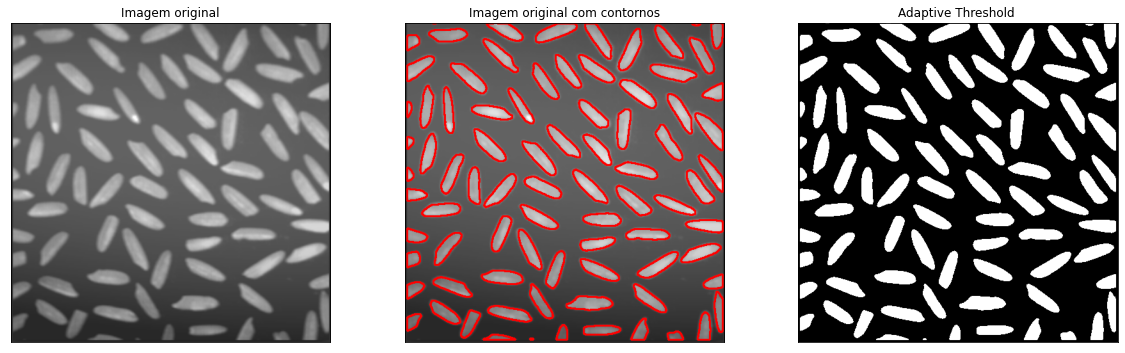

In [13]:
print("A imagem tem "+str(len(cnts))+" grãos de arroz") # A quantidade de arroz

plt.figure(figsize=(20, 20))
plt.subplot(3,3,1),plt.imshow(img_01,cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,2),plt.imshow(img_cnts,cmap = 'gray')
plt.title('Imagem original com contornos'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,3),plt.imshow(seg_02,cmap = 'gray')
plt.title('Adaptive Threshold '), plt.xticks([]), plt.yticks([])
plt.show()

### Limiarização Otsu’s thresholding
* [*Otsu’s thresholding*](https://en.wikipedia.org/wiki/Otsu's_method). O método de Otsu pressupõe que o histograma em tons de cinza das intensidades de pixel da imagem é bimodal  ( em palavras simples, imagem bimodal é uma imagem cujo histograma tem dois picos *background* e *foreground*). Com base no histograma da escala de cinza, o método de Otsu calcula um valor de limiar ideal $T$ de modo que a variação entre os picos de fundo e primeiro plano seja mínima. No entanto, o método de Otsu não tem conhecimento a priori de quais pixels pertencem ao primeiro plano e quais pixels pertencem ao plano de fundo - ele está simplesmente tentando separar de forma ideal os picos do histograma.

    O algoritmo procura exaustivamente o limite que minimiza a variância intraclasse, definido como uma soma ponderada das variâncias das duas classes:

\begin{equation}
\sigma_w^2(t) = w_0(t)\sigma_0^2(t)+w_1(t)\sigma_1^2(t)
\end{equation}
    
  Pesos $w_0$ e $w_1$ são as probabilidades das duas classes separadas por um limite $t$, e $\sigma_0^2$ e $\sigma_1^2$ são variações dessas duas classes.
  

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Otsu%27s_Method_Visualization.gif" width="600" height = "480"> 

(0.0, 256.0)

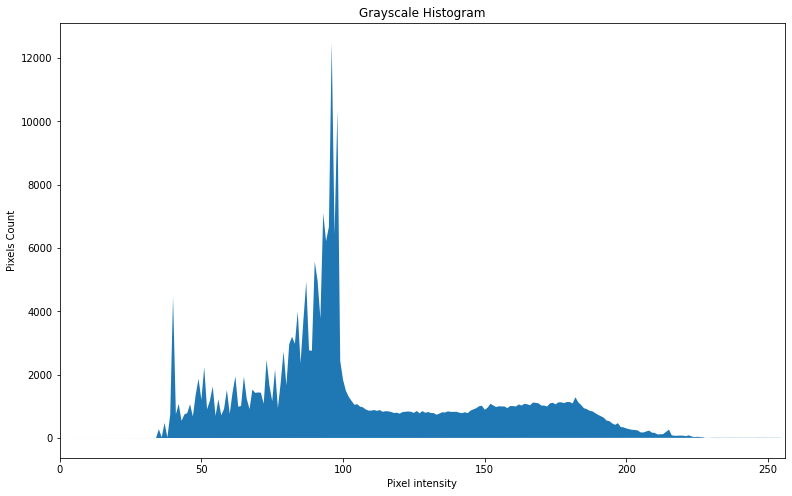

In [14]:
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

plt.figure(figsize=(13, 8))
plt.title("Grayscale Histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixels Count")
#plt.plot(hist)
plt.fill(hist)
plt.xlim([0, 256])

In [15]:
T, seg_03 = cv2.threshold(gray_image, 0, 255,
                          cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)


In [16]:
T

123.0

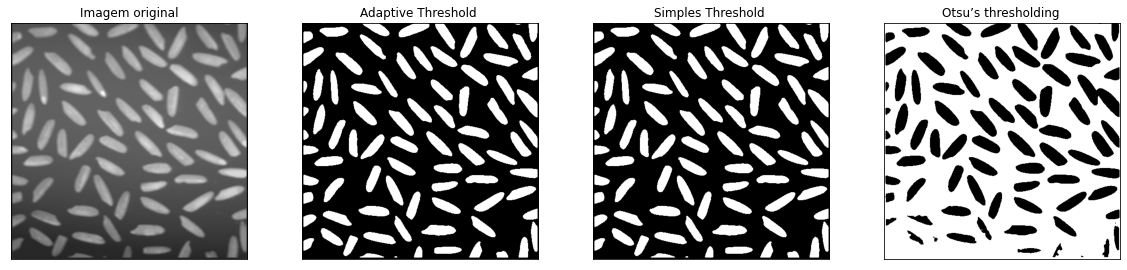

In [17]:
plt.figure(figsize=(20, 20))
plt.subplot(4,4,1),plt.imshow(img_01,cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])

plt.subplot(4,4,2),plt.imshow(seg_02,cmap = 'gray')
plt.title('Adaptive Threshold '), plt.xticks([]), plt.yticks([])

plt.subplot(4,4,3),plt.imshow(seg_02,cmap = 'gray')
plt.title('Simples Threshold '), plt.xticks([]), plt.yticks([])

plt.subplot(4,4,4),plt.imshow(seg_03,cmap = 'gray')
plt.title('Otsu’s thresholding '), plt.xticks([]), plt.yticks([])
plt.show()

## Métodos baseados em contornos/bordas (Operador Sobel)
A detecção de bordas inclui uma variedade de métodos matemáticos que visam identificar bordas, curvas em uma imagem digital em que o brilho da imagem muda acentuadamente ou, mais formalmente, tem descontinuidades. A detecção de bordas é uma ferramenta fundamental no processamento de imagens e visão computacional, particularmente nas áreas de detecção de recursose e extração de caracteristicas.

O filtro Sobel calcula o gradiente da intensidade da imagem em cada ponto, dando a direcção da maior variação de claro para escuro e a quantidade de variação nessa direcção. Assim, obtém-se uma noção de como varia a luminosidade em cada ponto, de forma mais suave ou brusca. Com isto consegue-se estimar a presença de uma transição claro-escuro e de qual a orientação desta. Como as variações claro-escuro intensas correspondem a fronteiras bem definidas entre objectos, consegue-se fazer a detecção de contornos.

Matematicamente este operador utiliza duas matrizes $3×3$ que são convoluídas com a imagem original para calcular aproximações das derivadas, uma para as variações horizontais e uma para as verticais. Sendo $A$ a imagem inicial então, $G_{x}$ e $G_{y}$ serão duas imagens que em cada ponto contêm uma aproximação das derivadas horizontal e vertical de $A$.





\begin{equation}
G_x = \begin{bmatrix}
-1 & 0 & +1\\
-2 & 0 & +2\\
-1 & 0 & +1
\end{bmatrix} * A
\end{equation}



\begin{equation}
G_y = \begin{bmatrix}
+1 & +2 & +1\\
0 & 0 & 0\\
-1 & -2 & -1
\end{bmatrix} * A
\end{equation}

Portanto a magnitude,  $G$, e a direcção, $\Theta$, do gradiente são dados por:

\begin{equation}
G = \sqrt{G_x^2 + G_y^2}
\end{equation}


\begin{equation}
\Theta = arctan\left ( \frac{G_y}{G_x}  \right )
\end{equation}

In [54]:
img_02 = cv2.imread('images/canny.png')
img_02 = cv2.cvtColor(img_02, cv2.COLOR_BGR2RGB)
image_02_gray = cv2.cvtColor(img_02, cv2.COLOR_BGR2GRAY)

In [64]:
sobelx = cv2.Sobel(image_02_gray,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(image_02_gray,cv2.CV_64F,0,1,ksize=5)  # y

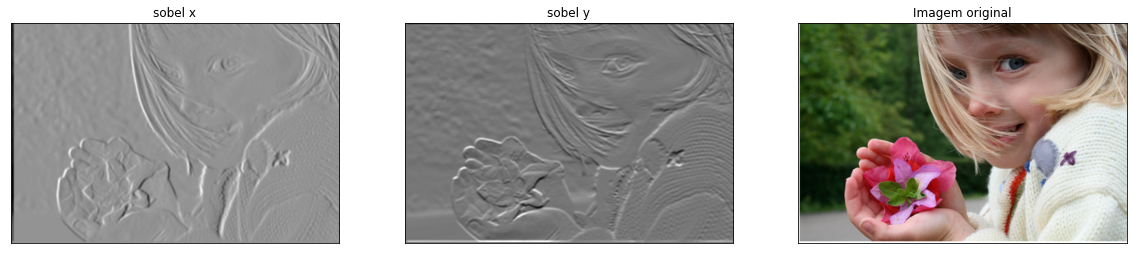

In [65]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('sobel x'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,2),plt.imshow(sobely,cmap = 'gray')
plt.title('sobel y'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,3),plt.imshow(img_02,cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.show()

## Métodos baseados em contornos/bordas (Canny)
Canny Edge Detection é um algoritmo de detecção de bordas popular. Ele foi desenvolvido por John F. Canny em 1986.

In [52]:
edges = cv2.Canny(image_02_gray,80,200)

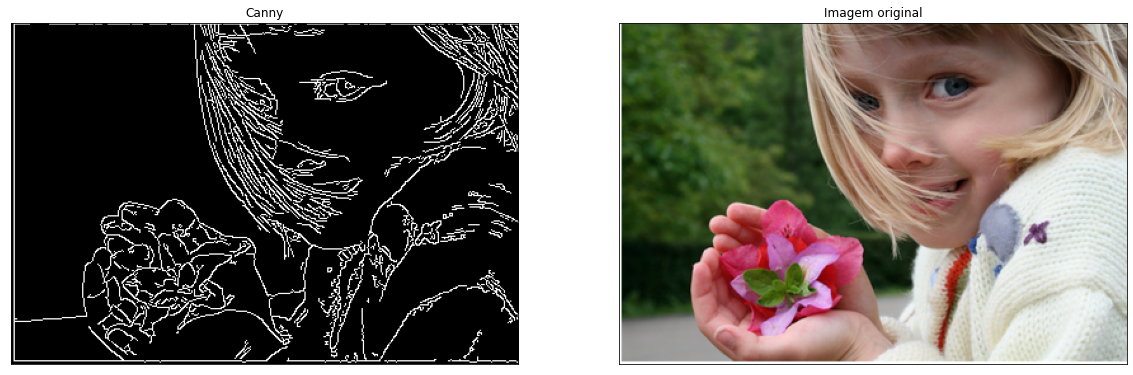

In [53]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1),plt.imshow(edges,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_02,cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.show()